In [1]:
## Topic modelling with BERTopic

In [97]:
import pandas as pd


In [98]:
# Load the dataset
df = pd.read_parquet('/Users/anna/Desktop/ANLP/Assignments/AT2/AT2B/Step2 Combined Data.parquet', engine='pyarrow')
#select random 10000 samples
df = df.sample(10000, random_state=1).reset_index(drop=True)
df.head()


,Unnamed: 0,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness,n_words,n_sents,polarity,subjectivity,n_punct,Readablity,Text_Cleaned
0,254440,481664,481665,B000G25PXY,ARAWTAPXAC66B,"Warren ""hiphopper""",8,10,1,1172361600,Disgusting...,"like eating mushy, decomposing cow tongue. th...",0.8,45,2,0.205833,0.538333,10,87.740417,like eat mushy decompose cow tongue way descri...
1,175623,333576,333577,B00188S3PM,ARXU7TM4XXI1D,"Emma M. Diaz ""Emma R.""",3,3,5,1332288000,No more breast milk!,let me start off by saying that i am not a tea...,1.0,165,11,0.233889,0.791667,14,92.054136,let I start I tea drinker I coffee person I de...
2,148176,281718,281719,B007RTR9DS,A3MUSWDCTZINQZ,"Ulalume Jones ""Creative Gal""",1,1,4,1344988800,Maybe I am one of the odd ones or just have in...,"i have pale skin, blue eyes and light yet thic...",1.0,112,7,0.004833,0.516389,12,100.189091,I pale skin blue eye light thick hair I use ti...
3,8733,17109,17110,B0018CE5L4,A2VUNJQ13I4YR2,"Katie Bee ""Katie Bee""",1,1,3,1307404800,Mediocre,this cat food is adequate and nothing more. it...,1.0,42,4,0.277778,0.311111,5,103.700304,cat food adequate feed cat cat like I stick bi...
4,215454,408857,408858,B000XSGMHO,A3GO08RURRG0BK,"Mark Lebowitz ""Mar4k""",8,8,5,1198972800,"A tasty, kosher, healthier alternative to Pop ...","first and foremost, these toaster pastries tas...",1.0,250,8,0.321212,0.620076,38,71.301646,foremost toaster pastry taste great light crus...


In [99]:
reviews= df['Text_Cleaned']
reviews.head(3)

0    like eat mushy decompose cow tongue way descri...
1    let I start I tea drinker I coffee person I de...
2    I pale skin blue eye light thick hair I use ti...
Name: Text_Cleaned, dtype: object

In [100]:
# Stopwords: Set up stop words for removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /Users/anna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
#!pip install bertopic
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

#model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
#topics, probs = topic_model.fit_transform(reviews) #Extract topics from the reviews

vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)

model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(reviews) #create topics

Batches: 100%|██████████| 313/313 [06:19<00:00,  1.21s/it]
2023-05-06 21:57:45,214 - BERTopic - Transformed documents to Embeddings
2023-05-06 21:57:55,652 - BERTopic - Reduced dimensionality
2023-05-06 21:58:00,287 - BERTopic - Clustered reduced embeddings


In [102]:
#Extracting Topics
model.get_topic_info(); freq.head(10)

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,like eat mushy decompose cow tongue way descri...,-1,-1_tea_like_product_taste,tea - like - product - taste - good - flavor -...,0.768400,False
1,let I start I tea drinker I coffee person I de...,19,19_water_milk_ph_milk supply,water - milk - ph - milk supply - essentia - s...,0.678210,True
2,I pale skin blue eye light thick hair I use ti...,35,35_hair_shampoo_conditioner_scalp,hair - shampoo - conditioner - scalp - dandruf...,0.856836,False
3,cat food adequate feed cat cat like I stick bi...,1,1_cat_food_dog_eat,cat - food - dog - eat - feed - treat - love -...,0.285992,False
4,foremost toaster pastry taste great light crus...,2,2_cookie_cake_flour_chocolate,cookie - cake - flour - chocolate - good - glu...,0.100172,False
5,I cereal suppose heathly alternative suppose t...,7,7_cereal_rice_fiber_eat,cereal - rice - fiber - eat - snack - good - g...,1.000000,False
6,soup far package soup I easy taste use enchila...,9,9_soup_pasta_wheat_cook,soup - pasta - wheat - cook - taste - noodle -...,0.485747,False
7,I think good flavorful coffee I drink I love t...,0,0_coffee_cup_drink_taste,coffee - cup - drink - taste - flavor - like -...,0.427872,False
8,cookie great kid gfcf diet daughter love bit p...,2,2_cookie_cake_flour_chocolate,cookie - cake - flour - chocolate - good - glu...,0.109838,False
9,coffee mediocre quality I like highly acidic c...,0,0_coffee_cup_drink_taste,coffee - cup - drink - taste - flavor - like -...,0.449559,False


In [103]:
freq=model.get_document_info(reviews) #extract information on a document level
freq.head(10)

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,like eat mushy decompose cow tongue way descri...,-1,-1_taste_product_like_good,taste - product - like - good - use - flavor -...,0.716841,False
1,let I start I tea drinker I coffee person I de...,60,60_supply_milk supply_pump_milk,supply - milk supply - pump - milk - increase ...,0.653470,True
2,I pale skin blue eye light thick hair I use ti...,46,46_hair_shampoo_conditioner_scalp,hair - shampoo - conditioner - scalp - dandruf...,0.851707,False
3,cat food adequate feed cat cat like I stick bi...,3,3_cat_food_cat food_eat,cat - food - cat food - eat - cat love - cat e...,0.262495,False
4,foremost toaster pastry taste great light crus...,5,5_cookie_chocolate_chocolate chip_chip cookie,cookie - chocolate - chocolate chip - chip coo...,0.031543,False
5,I cereal suppose heathly alternative suppose t...,43,43_cereal_fiber_gram_gram fiber,cereal - fiber - gram - gram fiber - kashi - h...,1.000000,False
6,soup far package soup I easy taste use enchila...,11,11_soup_chicken_tomato soup_tomato,soup - chicken - tomato soup - tomato - pea - ...,1.000000,False
7,I think good flavorful coffee I drink I love t...,0,0_coffee_cup_pod_brew,coffee - cup - pod - brew - roast - strong - c...,0.208647,False
8,cookie great kid gfcf diet daughter love bit p...,5,5_cookie_chocolate_chocolate chip_chip cookie,cookie - chocolate - chocolate chip - chip coo...,0.036531,False
9,coffee mediocre quality I like highly acidic c...,0,0_coffee_cup_pod_brew,coffee - cup - pod - brew - roast - strong - c...,0.350300,False


In [104]:
freq_helpful = pd.concat([df[['Helpfulness']].reset_index(),
                          freq], axis=1)
freq_helpful.head(10)

,index,Helpfulness,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,0,0.800000,like eat mushy decompose cow tongue way descri...,-1,-1_taste_product_like_good,taste - product - like - good - use - flavor -...,0.716841,False
1,1,1.000000,let I start I tea drinker I coffee person I de...,60,60_supply_milk supply_pump_milk,supply - milk supply - pump - milk - increase ...,0.653470,True
2,2,1.000000,I pale skin blue eye light thick hair I use ti...,46,46_hair_shampoo_conditioner_scalp,hair - shampoo - conditioner - scalp - dandruf...,0.851707,False
3,3,1.000000,cat food adequate feed cat cat like I stick bi...,3,3_cat_food_cat food_eat,cat - food - cat food - eat - cat love - cat e...,0.262495,False
4,4,1.000000,foremost toaster pastry taste great light crus...,5,5_cookie_chocolate_chocolate chip_chip cookie,cookie - chocolate - chocolate chip - chip coo...,0.031543,False
5,5,0.333333,I cereal suppose heathly alternative suppose t...,43,43_cereal_fiber_gram_gram fiber,cereal - fiber - gram - gram fiber - kashi - h...,1.000000,False
6,6,1.000000,soup far package soup I easy taste use enchila...,11,11_soup_chicken_tomato soup_tomato,soup - chicken - tomato soup - tomato - pea - ...,1.000000,False
7,7,0.250000,I think good flavorful coffee I drink I love t...,0,0_coffee_cup_pod_brew,coffee - cup - pod - brew - roast - strong - c...,0.208647,False
8,8,0.750000,cookie great kid gfcf diet daughter love bit p...,5,5_cookie_chocolate_chocolate chip_chip cookie,cookie - chocolate - chocolate chip - chip coo...,0.036531,False
9,9,0.000000,coffee mediocre quality I like highly acidic c...,0,0_coffee_cup_pod_brew,coffee - cup - pod - brew - roast - strong - c...,0.350300,False


In [105]:
# sorted mean Helpfulness values for each topic
rank_topics = freq_helpful.groupby('Topic')['Helpfulness'].mean()
rank_topics = rank_topics.sort_values(ascending=False)

rank_topics = pd.merge(left=rank_topics.reset_index(),
                       right=freq,
                       how='left',
                       on='Topic')
rank_topics.head(10)

,Topic,Helpfulness,Document,Name,Top_n_words,Probability,Representative_document
0,97,1.0,bar perfect snack late afternoon feel lethargi...,97_gluten free_gluten_bar_free,gluten free - gluten - bar - free - free bar -...,1.000000,True
1,97,1.0,bar delicious mention gluten free eat gluten f...,97_gluten free_gluten_bar_free,gluten free - gluten - bar - free - free bar -...,1.000000,False
2,97,1.0,I eat daily basis way gym work meal nutritious...,97_gluten free_gluten_bar_free,gluten free - gluten - bar - free - free bar -...,0.496563,False
3,97,1.0,I love granola bar gluten free market grow eas...,97_gluten free_gluten_bar_free,gluten free - gluten - bar - free - free bar -...,0.240195,False
4,97,1.0,I love fact gluten free product larabar right ...,97_gluten free_gluten_bar_free,gluten free - gluten - bar - free - free bar -...,1.000000,False
5,97,1.0,I gluten free bar awesome note like cranberry ...,97_gluten free_gluten_bar_free,gluten free - gluten - bar - free - free bar -...,1.000000,False
6,97,1.0,bar perfect snack late afternoon feel lethargi...,97_gluten free_gluten_bar_free,gluten free - gluten - bar - free - free bar -...,1.000000,True
7,97,1.0,far good tasting gluten free bar reasonable pr...,97_gluten free_gluten_bar_free,gluten free - gluten - bar - free - free bar -...,1.000000,False
8,97,1.0,kind bar natural gluten free great taste snack...,97_gluten free_gluten_bar_free,gluten free - gluten - bar - free - free bar -...,0.210109,True
9,97,1.0,bar delicious easy grab time factor I especial...,97_gluten free_gluten_bar_free,gluten free - gluten - bar - free - free bar -...,1.000000,False


In [106]:
rank_topics.tail(10)

,Topic,Helpfulness,Document,Name,Top_n_words,Probability,Representative_document
9990,56,0.44945,essentia slightly alkalinize water beverage ni...,56_water_ph_essentia_tap,water - ph - essentia - tap - test - bottled -...,0.158573,False
9991,56,0.44945,drink week I health improvement taste little I...,56_water_ph_essentia_tap,water - ph - essentia - tap - test - bottled -...,1.000000,False
9992,56,0.44945,I honestly know overly concerned ph balance el...,56_water_ph_essentia_tap,water - ph - essentia - tap - test - bottled -...,0.203554,False
9993,56,0.44945,product complete waste money I long distance m...,56_water_ph_essentia_tap,water - ph - essentia - tap - test - bottled -...,0.168395,False
9994,56,0.44945,water taste lite clean I find drink water cert...,56_water_ph_essentia_tap,water - ph - essentia - tap - test - bottled -...,0.046920,False
9995,56,0.44945,I skeptic water claim regular product summary ...,56_water_ph_essentia_tap,water - ph - essentia - tap - test - bottled -...,1.000000,False
9996,56,0.44945,realize beneficial water cost way gasoline cos...,56_water_ph_essentia_tap,water - ph - essentia - tap - test - bottled -...,1.000000,False
9997,56,0.44945,I like water ph suppose addition taste good I ...,56_water_ph_essentia_tap,water - ph - essentia - tap - test - bottled -...,0.705597,False
9998,56,0.44945,test people cup filter tap water essentia wate...,56_water_ph_essentia_tap,water - ph - essentia - tap - test - bottled -...,0.375312,False
9999,56,0.44945,company interesting philosophy filter water re...,56_water_ph_essentia_tap,water - ph - essentia - tap - test - bottled -...,1.000000,True


In [107]:
#Attributes
model.topics_[:10]

[-1, 60, 46, 3, 5, 43, 11, 0, 5, 0]

In [108]:
#!pip install nbformat --upgrade

In [109]:
model.visualize_topics()

In [110]:
model.visualize_distribution(probs[200], min_probability=0.015)

In [111]:
model.visualize_hierarchy(top_n_topics=50)

In [112]:
model.visualize_barchart(top_n_topics=5)


In [113]:
model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [114]:
#Visualize Term Score Decline
#W can plot the c-TF-IDF scores for each topic by the term rank of each word
model.visualize_term_rank()

In [68]:
#Reduce Topics
model.reduce_topics(reviews, nr_topics=60) 
print(model.topics_)

2023-05-06 21:30:06,954 - BERTopic - Reduced number of topics from 117 to 60


[-1, 19, 35, 1, 2, 7, 9, 0, 2, 0, -1, -1, -1, 1, 2, 4, -1, 3, 0, 15, -1, -1, 3, 9, -1, -1, 0, -1, 0, 5, -1, 15, -1, -1, 5, 11, -1, 1, 9, 1, 6, -1, -1, 6, -1, -1, -1, 1, -1, 0, -1, 3, 24, 31, -1, -1, -1, -1, 0, 16, 16, -1, 1, 20, -1, -1, -1, -1, 6, 0, 0, 1, 24, -1, 1, 2, -1, 3, 0, 2, -1, 0, 1, 1, 5, 8, -1, 0, 1, -1, -1, -1, 0, 5, 1, -1, -1, 0, 0, 0, 16, 51, 14, 7, 0, 6, -1, 1, -1, 0, -1, -1, -1, -1, 16, -1, 1, 33, 8, 0, -1, -1, -1, -1, 0, 43, 0, 15, 0, -1, 0, 8, 1, 2, 26, 14, -1, -1, 0, 1, 38, 2, 0, 3, -1, -1, 0, -1, 31, 1, -1, 9, 2, -1, -1, -1, 12, -1, 19, -1, -1, 0, -1, 0, -1, -1, 9, 1, -1, 16, 15, 9, 26, -1, 5, 0, 47, 0, 5, -1, 1, -1, 8, 1, -1, -1, -1, 21, -1, 34, 1, 18, 8, 0, -1, 35, -1, 30, -1, 14, 36, -1, -1, -1, 1, 4, 0, -1, 0, 5, 31, 10, -1, 7, -1, 1, -1, 40, 1, 0, -1, -1, 4, 1, 20, -1, 6, 0, 5, 3, 23, -1, 2, -1, 6, -1, -1, 18, -1, 3, 25, -1, -1, 9, 4, -1, 0, 1, 1, 19, -1, -1, 8, -1, 41, 1, 9, -1, -1, -1, 24, 0, -1, 17, 0, -1, -1, 14, 2, -1, 0, 53, -1, -1, 13, -1, 0, 8, 0, 9, 0,

In [69]:
#Search Topics
#search for topic similar to an input search term. 
#For example, search for topics and closely related search term'coffee'.
similar_topics, similarity = model.find_topics("coffee", top_n=5); similar_topics

[0, 4, 19, 13, 40]

In [70]:
model.get_topic(1)

[('cat', 0.03030979304555369),
 ('food', 0.02895515389257926),
 ('dog', 0.016932881434293598),
 ('eat', 0.015083154706464326),
 ('feed', 0.011694359441308942),
 ('treat', 0.009885865135799464),
 ('love', 0.009112954856222143),
 ('cat food', 0.00894464665592006),
 ('old', 0.007926865014359753),
 ('like', 0.007395645393780192)]

In [116]:
# Save model
model.save("/Users/anna/Desktop/ANLP/Assignments/AT2/AT2B/my_model")
# Load model
my_model = BERTopic.load("/Users/anna/Desktop/ANLP/Assignments/AT2/AT2B/my_model")	

In [120]:
#Embedding Models

from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
sentence_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [122]:
n = len(reviews)
n

10000

In [140]:
import numpy as np
from tqdm.auto import tqdm

batch_size = 10000

embeds = np.zeros((n, sentence_model.get_sentence_embedding_dimension()))

for i in tqdm(range(0, n, batch_size)):
    i_end = min(i+batch_size, n)
    batch = reviews[i:i_end]
    batch_embed = sentence_model.encode(batch)
    embeds[i:i_end,:] = batch_embed

#sentence_embeddings = model.encode(reviews)

100%|██████████| 1/1 [08:03<00:00, 483.95s/it]


In [141]:
import umap
fit = umap.UMAP(n_neighbors=3, n_components=3, min_dist=0.05)
u = fit.fit_transform(embeds)

In [142]:
import plotly.graph_objects as go

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=u[:, 0],
    y=u[:, 1],
    z=u[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        opacity=0.8,
        color=labels,
        colorscale='Viridis'
    )
)])

# Set plot layout
fig.update_layout(
    scene=dict(
        xaxis_title='UMAP Component 1',
        yaxis_title='UMAP Component 2',
        zaxis_title='UMAP Component 3'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Show plot
fig.show()


<Axes: ylabel='$\\lambda$ value'>

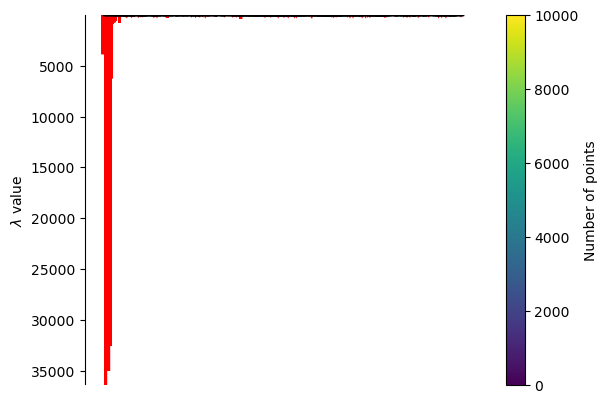

In [143]:
#HDBSCAN Clustering
#Sinceour data is unlabeled, we can use HDBSCAN to cluster the data based on the UMAP embeddings.
#Meaning we can benefit from the easier tuning and visualization of hierarchical data, handle irregular cluster shapes, and identify outliers.
import hdbscan

clusterer = hdbscan.HDBSCAN()
clusterer.fit(u)

clusterer.condensed_tree_.plot(select_clusters=True)

<Axes: ylabel='$\\lambda$ value'>

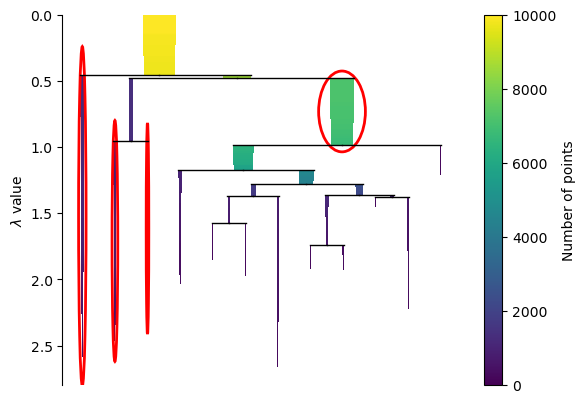

In [160]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=200, min_samples=50,
)
clusterer.fit(u)

clusterer.condensed_tree_.plot(select_clusters=True)

In [166]:
# Create 3D scatter plot

fig = go.Figure(data=[go.Scatter3d(
    x=u[:, 0],
    y=u[:, 1],
    z=u[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        opacity=0.8,
        color=clusterer.labels_,
        colorscale='Viridis'
    )
)])

# Set plot layout
fig.update_layout(
    scene=dict(
        xaxis_title='UMAP Component 1',
        yaxis_title='UMAP Component 2',
        zaxis_title='UMAP Component 3'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    legend_orientation='h'
)

# Show plot
fig.show()


In [169]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.05)
hdbscan_model = HDBSCAN(min_cluster_size=80, min_samples=40,
                        gen_min_span_tree=True,
                        prediction_data=True)

In [170]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stopwords = list(stopwords.words('english')) + ['http', 'https', 'amp', 'com']

# we add this to remove stopwords that can pollute topcs
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)


In [172]:
from bertopic import BERTopic

model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(reviews)

Batches: 100%|██████████| 313/313 [06:54<00:00,  1.33s/it]
2023-05-07 11:54:32,349 - BERTopic - Transformed documents to Embeddings
2023-05-07 11:54:39,428 - BERTopic - Reduced dimensionality
2023-05-07 11:54:40,199 - BERTopic - Clustered reduced embeddings


In [173]:
#We can visualize the new topics 
model.visualize_barchart()